# Customer segmentation and  next item prediction:

# Exploratory data analysis:

### This is an online retail dataset and the main aim of choosing this dataset is to find customer cluster, next purchase item

# Origin: 

This online retail dataset is collected from UCI machine learning repository

# Data Set Information:

This is a transactional data set which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

# Problem Statement: 

Retail business is one of the huge fields where we can apply data science and machine learning. We as retail business owners, use transaction data, which is recording data result in connections with sales-purchase activities at a company, to identify and understand customer’s data in all aspects and to perform any operation and get data insights.

In these recent years, transaction data have been prevalently used as research objects in means of discovering new information.  FFor instance, to increase sales of our store, we need to explore all possible ways like creating promotions, applying discounts on items, etc.  So, we start asking a question, which products should be discounted? How do we apply the discounts? Are there any patterns that occur to our sales, so that we could apply the promotion more accurately? To answer these types of questions, the only way is to understand data, perform some analysis and conclude with proper answer.


### Some of the ways which we follow to help retailers are:  


#### Customer Segmentation:

As we know, the needs and wants of customers are different from each other and companies are now using different techniques to better identify their needs to satisfy them. One of the ways of targeting customers is by grouping similar customers which is known as customer segmentation, an important technique which divides data or customers into segments and hence it helps in targeting selected segments based on its competitive advantages. Also, this customer segmentation is considered as a tool which has virtually unlimited potential to guide companies towards effective ways to market products to introduce new ones.

#### Market basket analysis: 

Along with this customer segmentation, transaction data can be utilized as to draw the relation of each purchased item inside the customer’ basket. By that information, we can make use of it for effective product display/assortment to attract customers’ interest. The commonly used application to analyze transaction data customers’ shopping basket is market basket analysis.


Market Basket Analysis is an analysis mode performed on customer behavior whilst shopping at a supermarket through the means identifying association and connections among various items placed by the customers in their shopping baskets. In specific, Market Basket Analysis aims at simultaneously identifying the most frequently purchased items by customers. Using market basket analysis mode, a knowledge of what are the items often purchased by the customers simultaneously and having an opportunity to be promoted can be obtained. With regards to the objective of market basket analysis mode to decide which products that customers purchase at the same time, whereby the name of this mode is taken from the behavior of the customers in placing shopping products into their shopping baskets or shopping list. Over identifying shopping basket pattern of a customer will significantly be able to help a company in using that information in respect of business strategy needs, one of them is placing the most frequently purchased products simultaneously into one specific area or by giving discounts on predicted products to increase sale. 

# Steps: 

In this notebook, we will follow the following steps:

- Step 1 - Loading the required libraries and modules.
- Step 2 - Loading the data and performing basic data checks.
- Step 3 - Performing some exploratory data analysis
 
 Modelling steps will be continued in next notebook

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from collections import Counter
from mlxtend.frequent_patterns import association_rules, apriori
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import pycountry
import pycountry_convert as pc





%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Step2: Read data into dataframe

In [2]:
df = pd.read_csv('C:/Users/Subbu/Documents/Github2021/DSgithub/labs/CapstoneData_trials/online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


To get concise summary about datset we can use `info()` function:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


To get statistical details about dataset, we can use `describe()` method:

In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


Checking number of null values present in dataset: 

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Deleting presented null values from dataframe using `dropna()` function

In [6]:
df = df.dropna()

In [7]:
df.reset_index(drop = True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


We have noticed quantity being in negative numbers. So considering this as misleading data, we are ignoring these values

In [8]:
df['Quantity'].unique()

array([    12,     48,     24,     10,     18,      3,     16,      4,
            2,      6,      8,      1,     28,     30,     60,     32,
           56,      9,     25,     36,     20,    -12,     -6,     -4,
          -24,     -3,     -2,    576,    288,     27,     64,    160,
            5,     -1,     72,     50,     54,      7,    800,     11,
           58,    192,     96,    144,    100,    180,    216,     15,
          240,    108,     33,     90,     81,    -81,    -48,     17,
           -5,     40,     -8,     -9,     13,     21,    120,    200,
          168,     19,    280,    128,   -150,    -18,    -23,     80,
          300,    450,     14,     61,    480,     -7,     46,    504,
           45,   4320,   5184,   4008,     22,    600,    505,    500,
           23,     47,    432,    252,     75,    -16,   -504,   -600,
         -252,   -246,    -36,    360,    107,     49,     42,     66,
          -10,     34,     52,    400,     70,    936,    -32,    -60,
      

In [9]:
df = df[df.Quantity >= 0].reset_index(drop = True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
805615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
805616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
805617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
805618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
df.describe()

,Quantity,Price,Customer ID
count,805620.000000,805620.000000,805620.000000
mean,13.307665,3.206279,15331.856250
std,144.306739,29.197901,1696.768395
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13982.000000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16805.000000
max,80995.000000,10953.500000,18287.000000


Using the following function, we change the `Customer ID` which is float into int. 

In [11]:
def float_int(s):
    int_value = int(float(s))
    return int_value

In [12]:
df['Customer ID'] = df['Customer ID'].apply(float_int)

# Step_3: Understanding data?

Finding count of countries, involved in these retail transactions: 

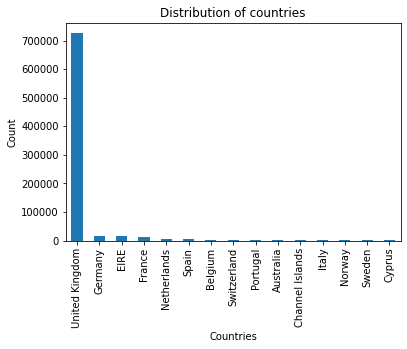

In [13]:
df.Country.value_counts()[:15].plot(kind = 'bar')

plt.title('Distribution of countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

We found United Kingdom is having very frequent transactions in the above plot.

In [14]:
df.nunique()

Invoice        36975
StockCode       4631
Description     5283
Quantity         438
InvoiceDate    34591
Price            666
Customer ID     5881
Country           41
dtype: int64

Using `Price` and `Quantity` to find the sales of product,sales done by customers, etc. 

C:\Users\Subbu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


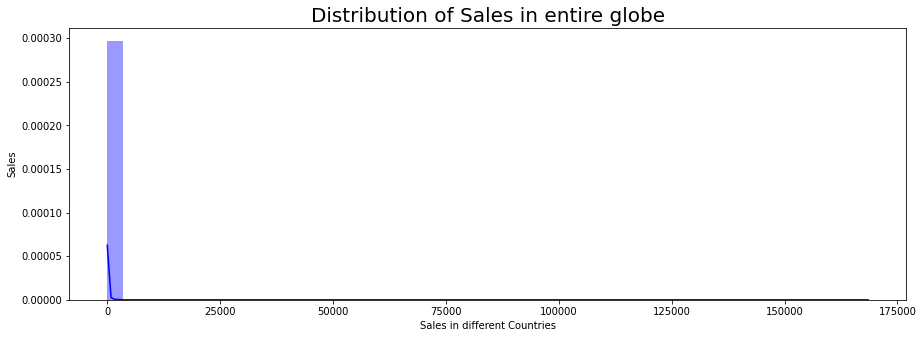

In [15]:
df['Sales'] = df['Price'] * df['Quantity']


# visualizing the sales in the entire globe
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Sales'], color = 'blue')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

The above plots interprets the distribution of sale of all the countries in the dataframe and we can see most of the countries are ranging less than 6000$ 

In [16]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:]

Country
EIRE                    621631.110
Netherlands             554232.340
Germany                 431262.461
France                  355257.470
Australia               169968.110
Spain                   109178.530
Switzerland             100365.340
Sweden                   91549.720
Denmark                  69862.190
Belgium                  65753.420
Norway                   60109.620
Portugal                 57285.300
Japan                    47138.390
Channel Islands          44996.760
Italy                    32550.420
Finland                  29925.540
Singapore                25317.060
Cyprus                   24980.130
Austria                  23613.010
Greece                   19096.190
Poland                   10902.450
Israel                   10421.090
United Arab Emirates      9202.690
Unspecified               8613.650
USA                       8366.860
Malta                     8099.090
Lithuania                 6553.740
Iceland                   5633.320
Canada      

In [17]:
# # find sc-status types with counts 
# serverStatus = df_ht_cleaned['sc-status']
# Keywords= df_ht_cleaned['sc-status'].unique()
# KeywordCount = np.zeros(len(Keywords))
# for i in range(len(Keywords)):
#     KeywordCount[i] = len(serverStatus[serverStatus[0:].str.endswith(Keywords[i])])

# # prepare for plotting
# colors = ['yellowgreen','red','gold','lightskyblue','pink','lightcoral','blue', 'darkgreen','yellow','grey','violet']
# porcent = 100.*KeywordCount/KeywordCount.sum()

# patches, texts = plt.pie(KeywordCount, colors=colors, startangle=90, radius=1.2)
# labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(Keywords, porcent)]

# # use legend to list all components
# sort_legend = True
# if sort_legend:
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, KeywordCount),
#                                           key=lambda x: x[2],
#                                           reverse=True))
# plt.title("Server Status")
# plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
#            fontsize=8)

In [18]:
# df_country = df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)

# df_country.plot(kind='pie', subplots=True, figsize=(8, 8))

Finding country sales using bar plot:

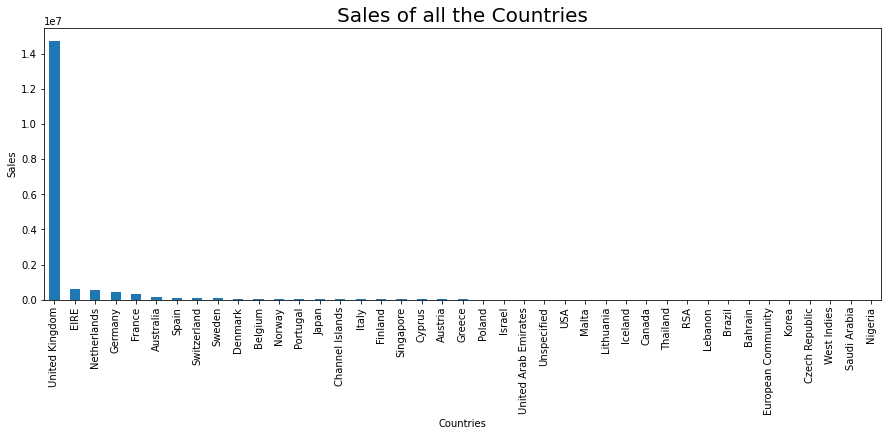

In [19]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False).plot(kind = 'bar')

# plt.rcParams['figure.figsize'] = (15, 5)

plt.title('Sales of all the Countries', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Sales')
plt.show()

As we found UK is having highest sale in the above plot, ignoring UK to better inspect above other countries in the below plot

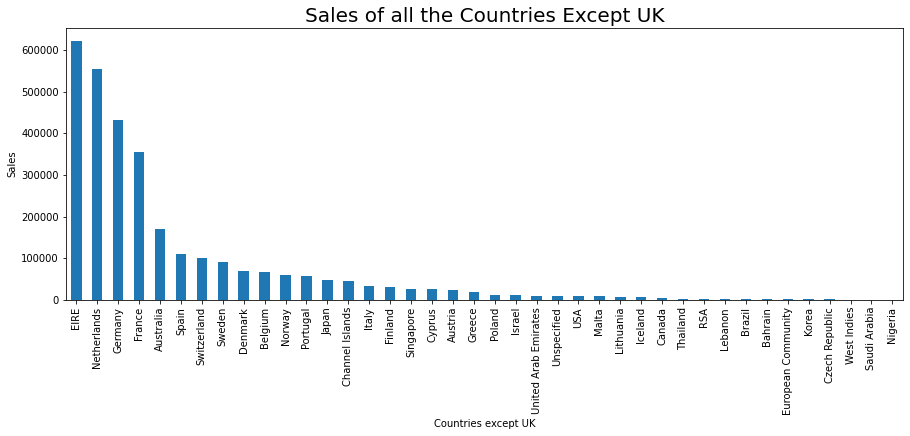

In [20]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)[1:].plot(kind = 'bar')

plt.title('Sales of all the Countries Except UK', fontsize = 20)
plt.xlabel('Countries except UK')
plt.ylabel('Sales')
plt.show()
plt.show()

<AxesSubplot:xlabel='InvoiceDate'>

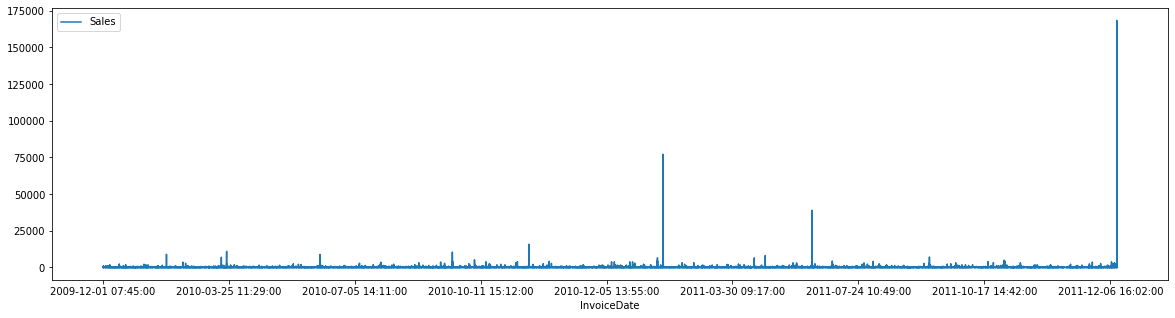

In [21]:
plt.rcParams['figure.figsize'] = (20, 5)

df.plot(x = 'InvoiceDate', y = 'Sales')

Changing the datatype of `InvoiceDate` to datetime type

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805620 entries, 0 to 805619
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  int64         
 7   Country      805620 non-null  object        
 8   Sales        805620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 55.3+ MB


What is the `Quantity` of products that are going most from store? 

To answer the above question, we can use `Description` column in the dataframe and find the `value_counts`. And to visualize the distribution, bar plot can used in the below cell

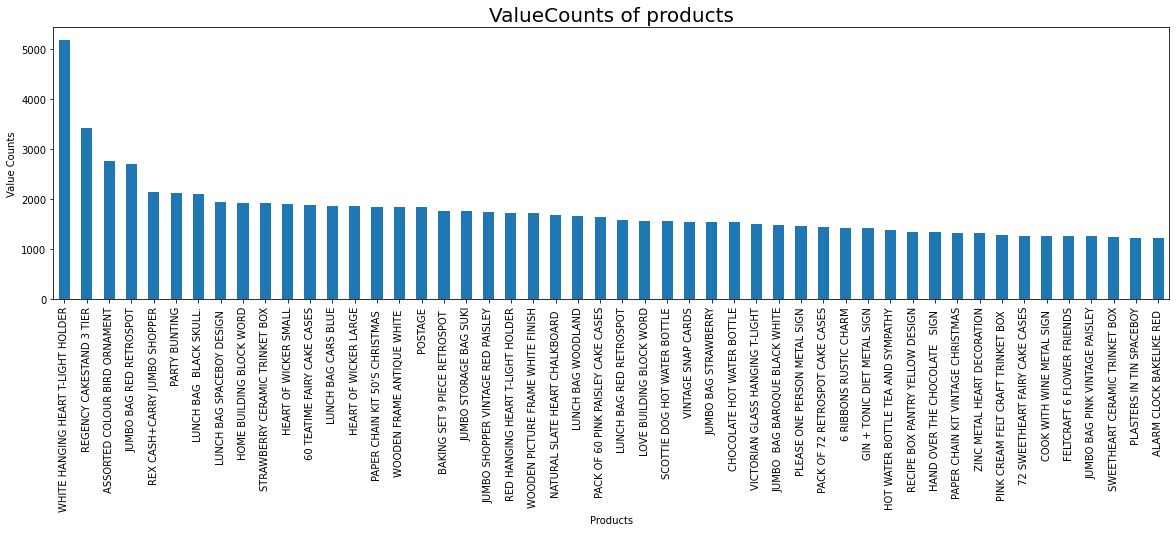

In [24]:
df['Description'].value_counts()[:50].plot(kind = 'bar')

plt.title('ValueCounts of products', fontsize = 20)
plt.xlabel('Products')
plt.ylabel('Value Counts')
plt.show()

<AxesSubplot:>

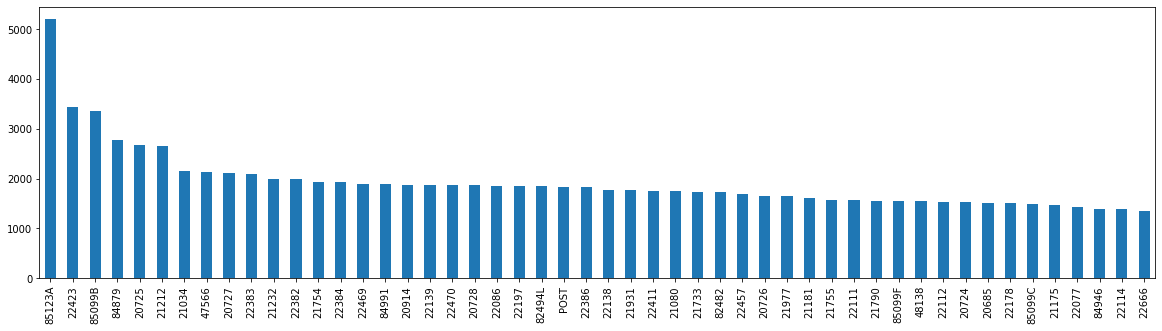

In [25]:
df['StockCode'].value_counts().head(50).plot(kind = 'bar')

In [26]:
# df.groupby('Sales')['Country'].apply(lambda x : pd.Series(sorted(x.values.tolist())))

In [27]:
# df_mod = df[['Sales','StockCode']].value_counts().reset_index(name = 'Count')
# print(df_mod)

# print(df_mod[['StockCode','Count']])

What are the `Sales` of products and top products that are giving store good revenue? 

To answer the above question, we can use `Description`/`StockCode` columns in the dataframe. And to visualize the distribution, bar plot can used in the below 2 cells with column names on X-axis and sales count on y-axis

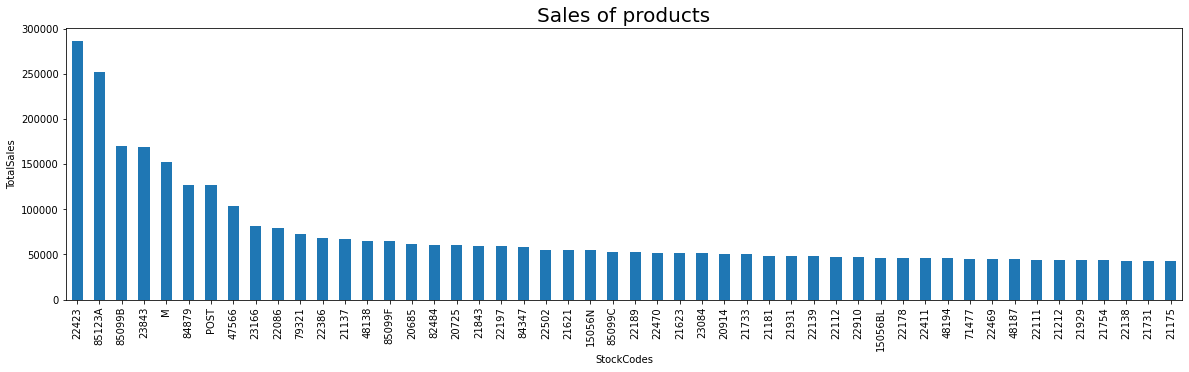

In [28]:
df['Sales'].groupby(df['StockCode']).agg('sum').sort_values(ascending = False).head(50).plot.bar()

plt.title('Sales of products', fontsize = 20)
plt.xlabel('StockCodes')
plt.ylabel('TotalSales')
plt.show()

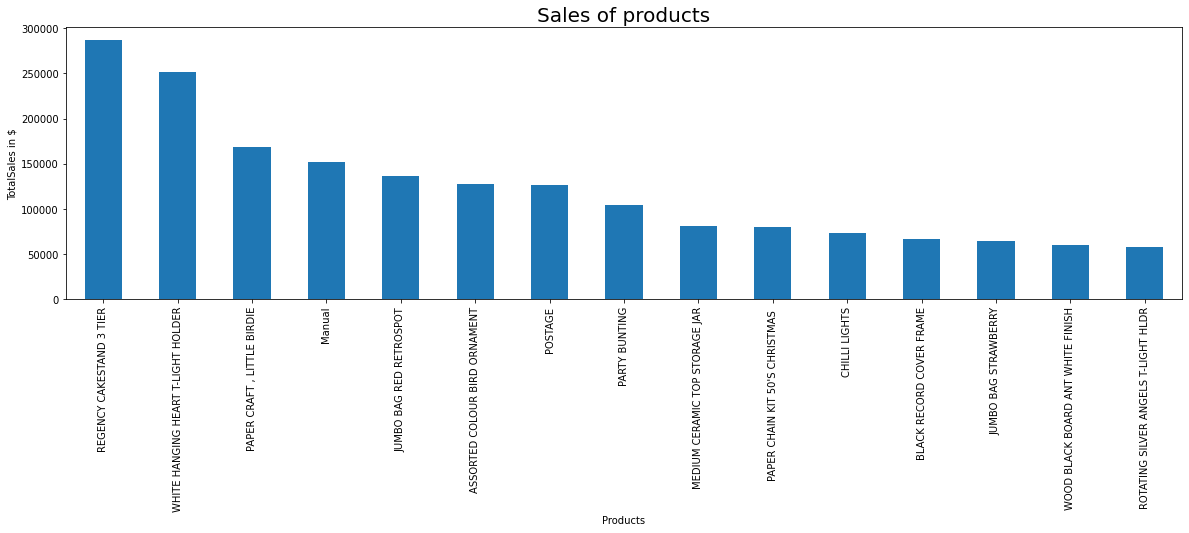

In [29]:
df['Sales'].groupby(df['Description']).agg('sum').sort_values(ascending = False).head(15).plot.bar()

plt.title('Sales of products', fontsize = 20)
plt.xlabel('Products')
plt.ylabel('TotalSales in $')
plt.show()

Using dummy dataframe to add extra columns like month, year, etc. to the original dataframe without changing the original one

In [30]:
modified_df = df[['StockCode','InvoiceDate','Country','Customer ID','Sales','Description']].copy()
modified_df['Month'] = modified_df['InvoiceDate'].dt.month 
modified_df['Year'] = modified_df['InvoiceDate'].dt.year 
modified_df

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year
0,85048,2009-12-01 07:45:00,United Kingdom,13085,83.40,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009
1,79323P,2009-12-01 07:45:00,United Kingdom,13085,81.00,PINK CHERRY LIGHTS,12,2009
2,79323W,2009-12-01 07:45:00,United Kingdom,13085,81.00,WHITE CHERRY LIGHTS,12,2009
3,22041,2009-12-01 07:45:00,United Kingdom,13085,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009
4,21232,2009-12-01 07:45:00,United Kingdom,13085,30.00,STRAWBERRY CERAMIC TRINKET BOX,12,2009
...,...,...,...,...,...,...,...,...
805615,22899,2011-12-09 12:50:00,France,12680,12.60,CHILDREN'S APRON DOLLY GIRL,12,2011
805616,23254,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY DOLLY GIRL,12,2011
805617,23255,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY CIRCUS PARADE,12,2011
805618,22138,2011-12-09 12:50:00,France,12680,14.85,BAKING SET 9 PIECE RETROSPOT,12,2011


To visualize the months are having highest transactions, we can use bar plot as shown below with `Months` column on X-axis and `Sales` on y-axis

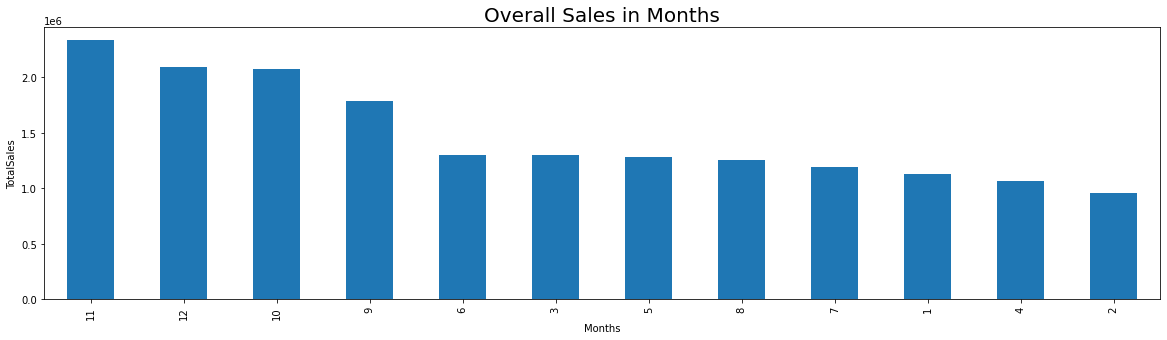

In [31]:
plt.rcParams['figure.figsize'] = (20, 5)

modified_df['Sales'].groupby(modified_df['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()

plt.title('Overall Sales in Months', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

And from the above plot, we can interpret that, on an average, November and December are having highest transaction in an year

<AxesSubplot:xlabel='Invoice'>

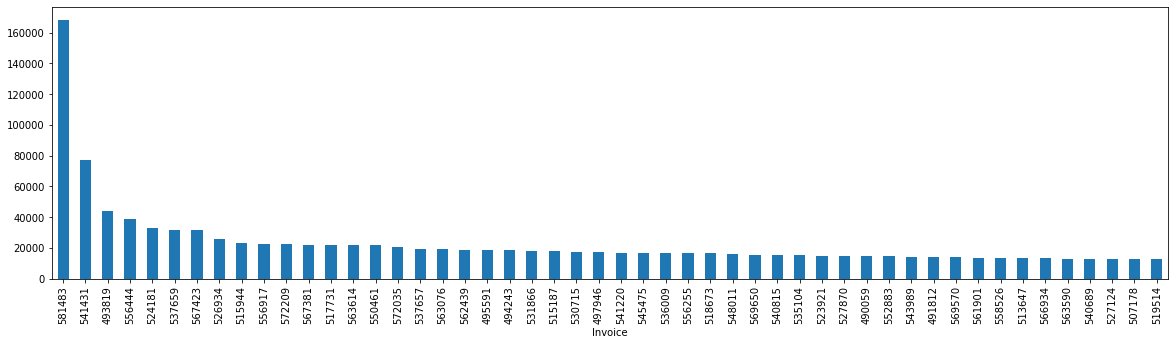

In [32]:
plt.rcParams['figure.figsize'] = (20, 5)

df['Sales'].groupby(df['Invoice']).agg('sum').sort_values(ascending = False).head(50).plot.bar()

# plt.title('Sales in Months', fontsize = 20)
# plt.xlabel('Months')
# plt.ylabel('TotalSales')
# plt.show()

Who are the top customers for the store?

To answer the above question, we can find `sales` of each customer by grouping `Customer ID` and visualize it using bar plot as shown below. 

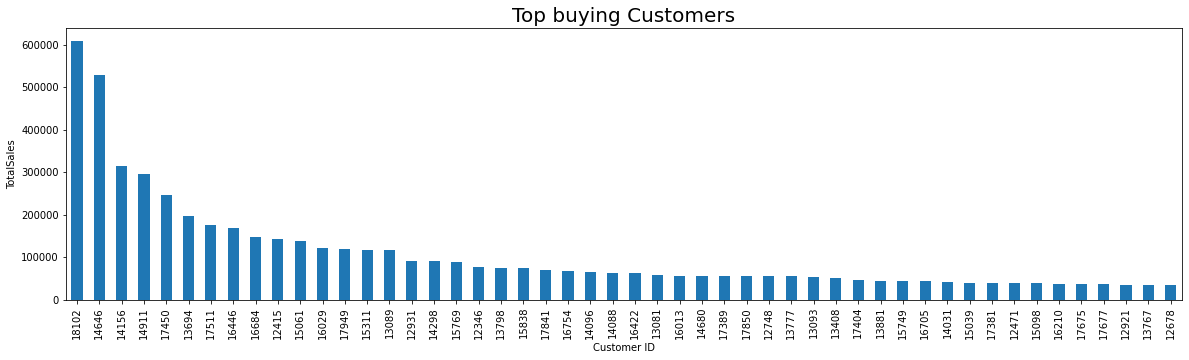

In [33]:
plt.rcParams['figure.figsize'] = (20, 5)

modified_df['Sales'].groupby(modified_df['Customer ID']).agg('sum').sort_values(ascending = False).head(50).plot.bar()

plt.title('Top buying Customers', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('TotalSales')
plt.show()

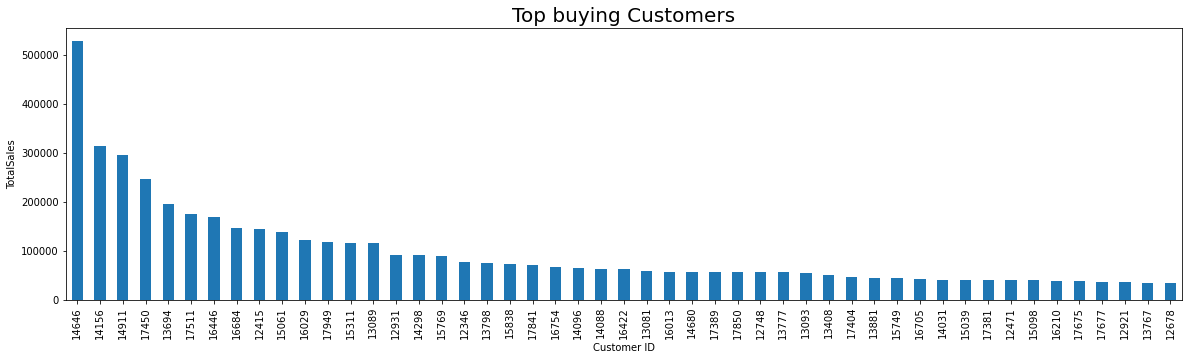

In [34]:
plt.rcParams['figure.figsize'] = (20, 5)

# modified_df['Sales'].groupby(modified_df['Customer ID']).agg('sum').sort_values(ascending = False)[2:].plot(kind = 'bar')
df['Sales'].groupby(df['Customer ID']).agg('sum').sort_values(ascending = False)[1:50].plot(kind = 'bar')


plt.title('Top buying Customers', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('TotalSales')
plt.show()

And from the above plot we can see top buying customers from different countries. But it's good to check their respective Countries as well. 

So below plot can be visualized to check top buying customers and their respective customers. 

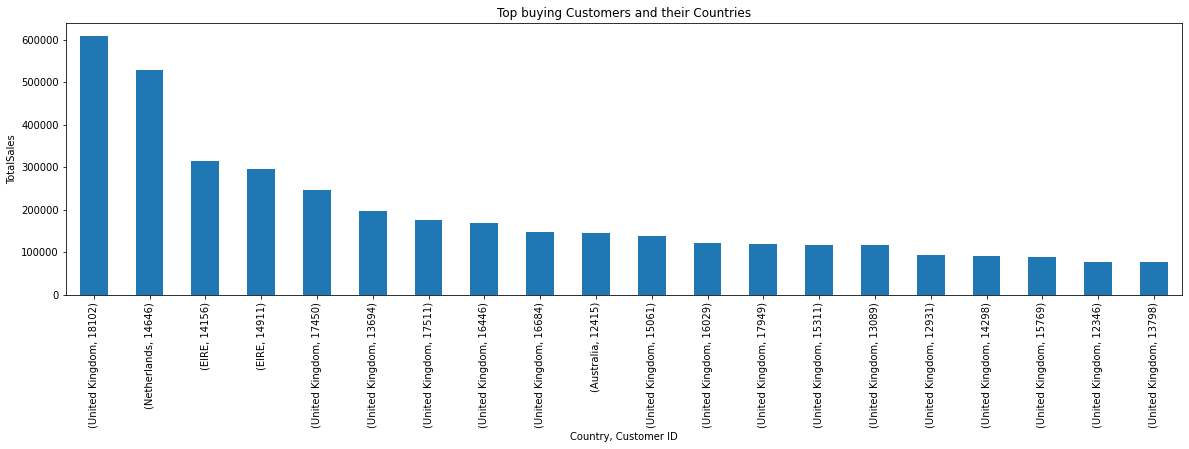

In [35]:
avg_sum = df.groupby(['Country','Customer ID']).sum() 
avg_sum = avg_sum.sort_values('Sales',ascending=False)
avg_sum['Sales'].head(20).plot(kind = 'bar')
plt.title('Top buying Customers and their Countries')
plt.xlabel('Country, Customer ID')
plt.ylabel('TotalSales')
plt.show()

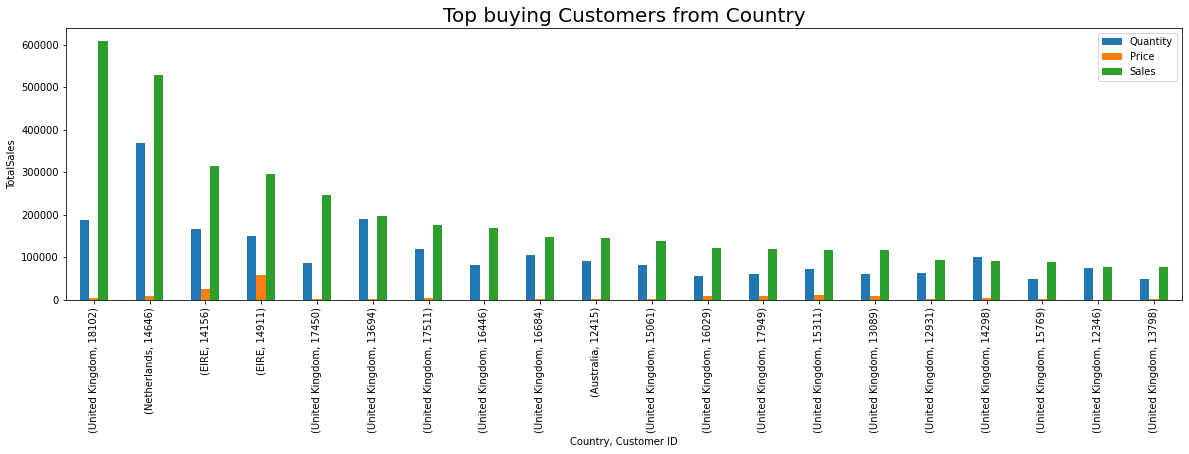

In [36]:
## Top 10 customers sales overall countries sorted by totalamount

plt.rcParams['figure.figsize'] = (20, 5)

avg_sum = df.groupby(['Country','Customer ID']).sum() 
avg_sum.sort_values('Sales',ascending=False).head(20).plot(kind = 'bar')

plt.title('Top buying Customers from Country', fontsize = 20)
plt.xlabel('Country, Customer ID')
plt.ylabel('TotalSales')
plt.show()

And we can see, from the above plot, customers from UK, EIRE, Australia are the promising customers.

As our data belongs to 3 different years, we can compare sales of different years and check for patterns by grouping `year`. 

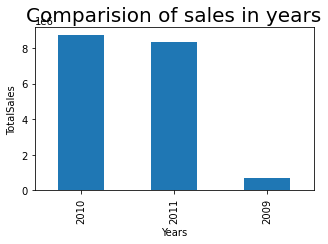

In [37]:
plt.rcParams['figure.figsize'] = (5, 3)

modified_df['Sales'].groupby(modified_df['Year']).agg('sum').sort_values(ascending = False).head(50).plot.bar()

plt.title('Comparision of sales in years', fontsize = 20)
plt.xlabel('Years')
plt.ylabel('TotalSales')
plt.show()

And we can interpret, 2009 having least transactions because our dataset contains only 1 month data in 2009 and then sale raised in 2010 but slightly decreased in 2011

In [38]:
df_modified = modified_df[['Month','Description']].value_counts().reset_index(name = 'count').head(50)
df_modified

,Month,Description,count
0,11,PAPER CHAIN KIT 50'S CHRISTMAS,661
1,12,WHITE HANGING HEART T-LIGHT HOLDER,655
2,11,WHITE HANGING HEART T-LIGHT HOLDER,627
3,11,HAND WARMER OWL DESIGN,518
4,11,PAPER CHAIN KIT VINTAGE CHRISTMAS,490
5,12,PAPER CHAIN KIT 50'S CHRISTMAS,474
6,11,HAND WARMER SCOTTY DOG DESIGN,466
7,11,RABBIT NIGHT LIGHT,466
8,12,SCOTTIE DOG HOT WATER BOTTLE,445
9,11,ASSORTED COLOUR BIRD ORNAMENT,441


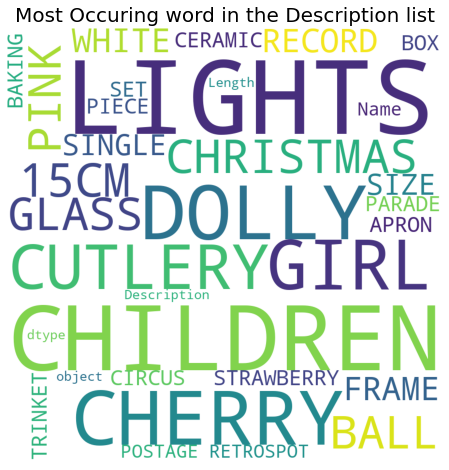

In [39]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (8, 8)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [40]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland', 'Lebanon',
       'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

In [41]:
#installation
# !pip install geopy


In [42]:
# pip install pycountry


In [43]:
# pip install pycountry-convert


To check the distribution of sales in each month for each country, it is impossible to plot distributions for each country. Hence, grouping countries based on continents, to minimise the complexity as shown below

In [44]:
def country_to_continent(country):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError:
        if country == 'EIRE':
            country_continent_code = 'Europe'
            return country_continent_code
        elif country == 'Channel Islands':
            country_continent_code = 'Europe'
            return country_continent_code
        elif country == 'RSA':
            country_continent_code = 'Africa' 
            return country_continent_code
        elif country == 'European Community':
            country_continent_code =  'Europe'
            return country_continent_code
        elif country == 'West Indies':
            country_continent_code = 'North America'
            return country_continent_code
        elif country == 'Korea':
            country_continent_code = 'Asia'
            return country_continent_code

In [45]:
modified_df['Continent'] = modified_df['Country'].apply(country_to_continent)

In [46]:
modified_df

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
0,85048,2009-12-01 07:45:00,United Kingdom,13085,83.40,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,Europe
1,79323P,2009-12-01 07:45:00,United Kingdom,13085,81.00,PINK CHERRY LIGHTS,12,2009,Europe
2,79323W,2009-12-01 07:45:00,United Kingdom,13085,81.00,WHITE CHERRY LIGHTS,12,2009,Europe
3,22041,2009-12-01 07:45:00,United Kingdom,13085,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
4,21232,2009-12-01 07:45:00,United Kingdom,13085,30.00,STRAWBERRY CERAMIC TRINKET BOX,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
805615,22899,2011-12-09 12:50:00,France,12680,12.60,CHILDREN'S APRON DOLLY GIRL,12,2011,Europe
805616,23254,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY DOLLY GIRL,12,2011,Europe
805617,23255,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY CIRCUS PARADE,12,2011,Europe
805618,22138,2011-12-09 12:50:00,France,12680,14.85,BAKING SET 9 PIECE RETROSPOT,12,2011,Europe


In [47]:
modified_df['Country'].value_counts()

United Kingdom          725296
Germany                  16703
EIRE                     15745
France                   13813
Netherlands               5093
Spain                     3720
Belgium                   3069
Switzerland               3012
Portugal                  2446
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1319
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Greece                     657
Unspecified                521
Poland                     512
Japan                      485
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94
Thailand

In [48]:
modified_df['Continent'].value_counts()

Europe           799420
Asia               2926
Oceania            1815
North America       691
Africa              153
South America        94
Name: Continent, dtype: int64

In [49]:
modified_df[['Description','Continent','Sales']].value_counts().reset_index(name = 'count')

,Description,Continent,Sales,count
0,WHITE HANGING HEART T-LIGHT HOLDER,Europe,17.70,1291
1,REX CASH+CARRY JUMBO SHOPPER,Europe,0.95,1203
2,ASSORTED COLOUR BIRD ORNAMENT,Europe,13.52,1058
3,REGENCY CAKESTAND 3 TIER,Europe,12.75,917
4,BAKING SET 9 PIECE RETROSPOT,Europe,14.85,871
...,...,...,...,...
66931,Manual,Europe,6.30,1
66932,Manual,Europe,6.48,1
66933,Manual,Europe,6.51,1
66934,Manual,Europe,6.60,1


In [50]:
eur = modified_df[(modified_df['Continent'] == 'Europe') &  (modified_df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER')]
eur

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
102,85123A,2009-12-01 09:46:00,United Kingdom,13635,17.70,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
147,85123A,2009-12-01 10:06:00,United Kingdom,13758,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
248,85123A,2009-12-01 10:52:00,United Kingdom,13767,163.20,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
337,85123A,2009-12-01 11:34:00,United Kingdom,16329,2.95,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
371,85123A,2009-12-01 11:37:00,United Kingdom,17700,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
802772,85123A,2011-12-08 10:59:00,United Kingdom,15453,2.95,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe
802807,85123A,2011-12-08 11:15:00,United Kingdom,16891,5.90,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe
803261,85123A,2011-12-08 12:28:00,United Kingdom,17830,17.70,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe
804723,85123A,2011-12-08 18:03:00,United Kingdom,17675,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe


<AxesSubplot:xlabel='Month'>

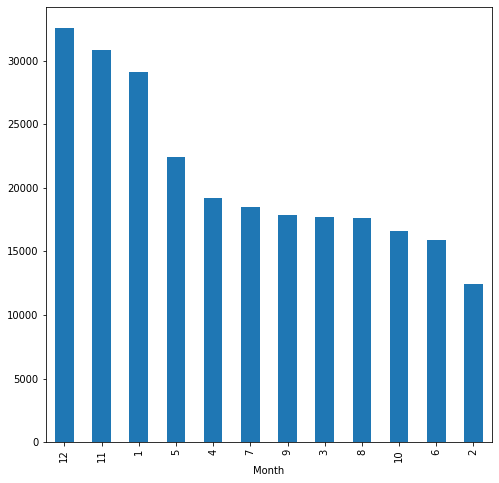

In [51]:
eur['Sales'].groupby(eur['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()


To check sales distribution in different months for continent `Europe`, extracting data from dataframe into a vraible and finding sales by grouping months.    

In [52]:
Europe = modified_df[modified_df['Continent'] == 'Europe']
Europe

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
0,85048,2009-12-01 07:45:00,United Kingdom,13085,83.40,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,Europe
1,79323P,2009-12-01 07:45:00,United Kingdom,13085,81.00,PINK CHERRY LIGHTS,12,2009,Europe
2,79323W,2009-12-01 07:45:00,United Kingdom,13085,81.00,WHITE CHERRY LIGHTS,12,2009,Europe
3,22041,2009-12-01 07:45:00,United Kingdom,13085,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
4,21232,2009-12-01 07:45:00,United Kingdom,13085,30.00,STRAWBERRY CERAMIC TRINKET BOX,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
805615,22899,2011-12-09 12:50:00,France,12680,12.60,CHILDREN'S APRON DOLLY GIRL,12,2011,Europe
805616,23254,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY DOLLY GIRL,12,2011,Europe
805617,23255,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY CIRCUS PARADE,12,2011,Europe
805618,22138,2011-12-09 12:50:00,France,12680,14.85,BAKING SET 9 PIECE RETROSPOT,12,2011,Europe


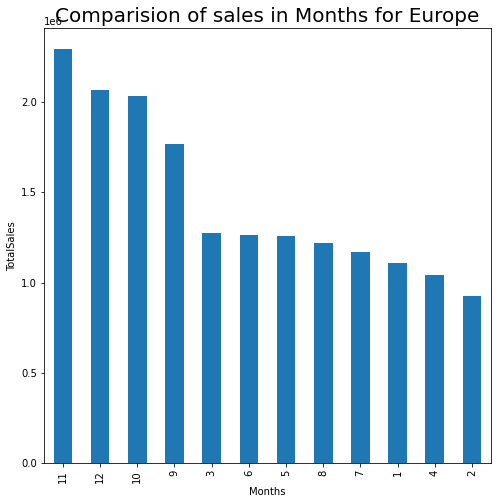

In [53]:
Europe['Sales'].groupby(Europe['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()


plt.title('Comparision of sales in Months for Europe', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, November andf December are having highest transactions. 

To check sales distribution in different months for continent `Asia`, extracting data from dataframe into a vraible and finding sales by grouping months.    

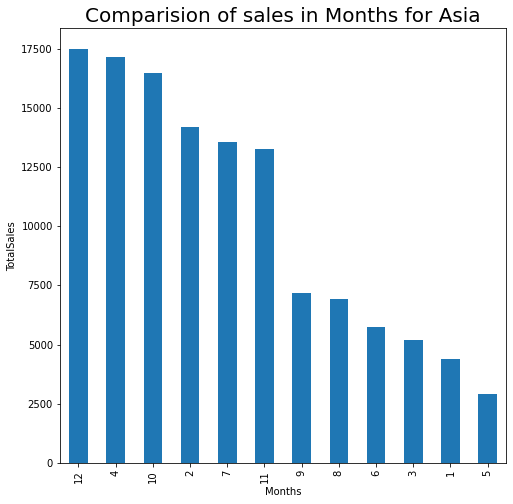

In [54]:
Asia = modified_df[modified_df['Continent'] == 'Asia']
Asia

Asia['Sales'].groupby(Asia['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()
plt.title('Comparision of sales in Months for Asia', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, December and April are having highest transactions. 

To check sales distribution in different months for continent `Oceania`, extracting data from dataframe into a vraible and finding sales by grouping months.    

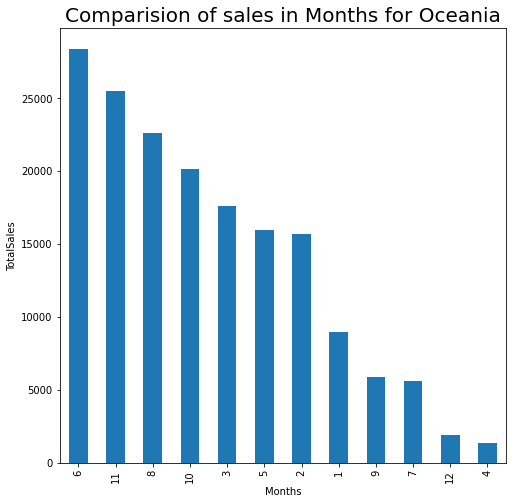

In [55]:
Oceania = modified_df[modified_df['Continent'] == 'Oceania']
Oceania

Oceania['Sales'].groupby(Oceania['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()
plt.title('Comparision of sales in Months for Oceania', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, June and November are having highest transactions. 

To check sales distribution in different months for continent `North America`, extracting data from dataframe into a vraible and finding sales by grouping months.    

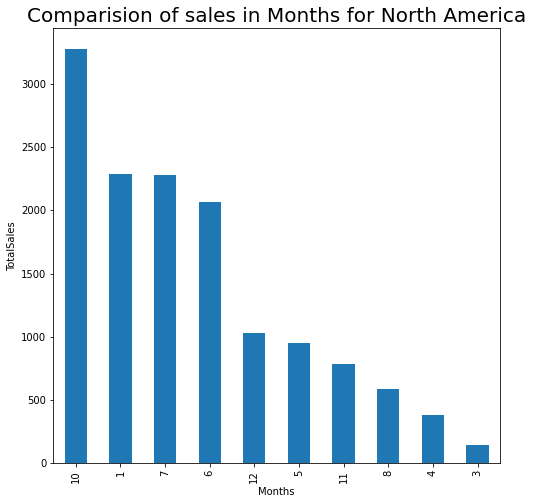

In [56]:
North_America = modified_df[modified_df['Continent'] == 'North America']
North_America 

North_America['Sales'].groupby(North_America['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()
plt.title('Comparision of sales in Months for North America', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, October and January are having highest transactions. 

To check sales distribution in different months for continent `Africa`, extracting data from dataframe into a vraible and finding sales by grouping months.    

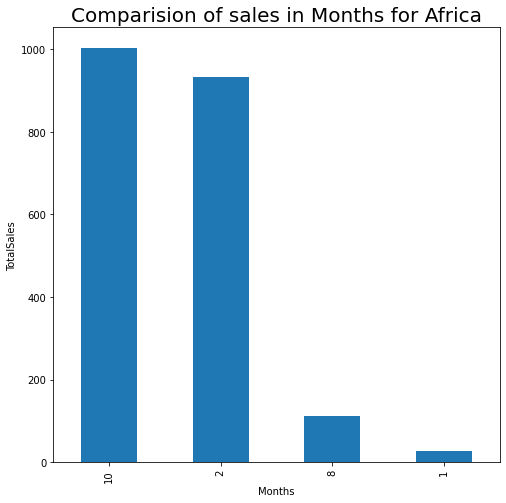

In [57]:
Africa = modified_df[modified_df['Continent'] == 'Africa']
Africa 

Africa['Sales'].groupby(Africa['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()
plt.title('Comparision of sales in Months for Africa', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, October and February are having highest transactions and also transactions were done only in 4 months. 

To check sales distribution in different months for continent `South America`, extracting data from dataframe into a vraible and finding sales by grouping months.    

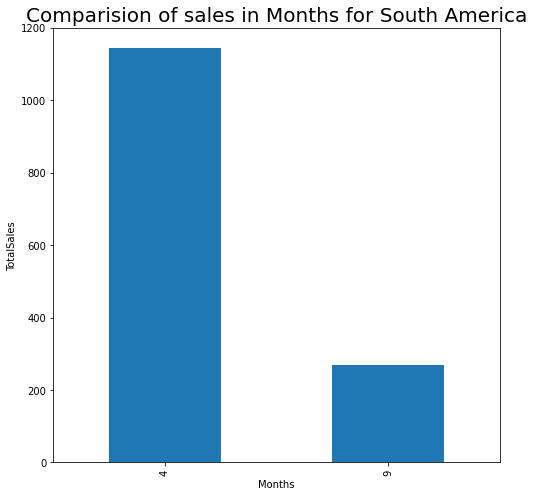

In [58]:
South_America = modified_df[modified_df['Continent'] == 'South America']
South_America 

South_America['Sales'].groupby(South_America['Month']).agg('sum').sort_values(ascending = False).head(50).plot.bar()
plt.title('Comparision of sales in Months for South America', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('TotalSales')
plt.show()

From the above plot, we can interpret, only in April and September transactions were done.

In [59]:
month_12 = modified_df[modified_df['Month'] == 12]
month_12

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
0,85048,2009-12-01 07:45:00,United Kingdom,13085,83.40,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,Europe
1,79323P,2009-12-01 07:45:00,United Kingdom,13085,81.00,PINK CHERRY LIGHTS,12,2009,Europe
2,79323W,2009-12-01 07:45:00,United Kingdom,13085,81.00,WHITE CHERRY LIGHTS,12,2009,Europe
3,22041,2009-12-01 07:45:00,United Kingdom,13085,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
4,21232,2009-12-01 07:45:00,United Kingdom,13085,30.00,STRAWBERRY CERAMIC TRINKET BOX,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
805615,22899,2011-12-09 12:50:00,France,12680,12.60,CHILDREN'S APRON DOLLY GIRL,12,2011,Europe
805616,23254,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY DOLLY GIRL,12,2011,Europe
805617,23255,2011-12-09 12:50:00,France,12680,16.60,CHILDRENS CUTLERY CIRCUS PARADE,12,2011,Europe
805618,22138,2011-12-09 12:50:00,France,12680,14.85,BAKING SET 9 PIECE RETROSPOT,12,2011,Europe


In [60]:
month_12[['Description','StockCode']].value_counts()

Description                         StockCode
WHITE HANGING HEART T-LIGHT HOLDER  85123A       655
PAPER CHAIN KIT 50'S CHRISTMAS      22086        474
SCOTTIE DOG HOT WATER BOTTLE        22111        445
CHOCOLATE HOT WATER BOTTLE          22112        367
HOT WATER BOTTLE TEA AND SYMPATHY   22114        345
                                                ... 
CLEAR STATIONERY BOX SET            16020C         1
PEACH KNITTED HEN                   35915C         1
PASTEL PINK PHOTO ALBUM             16202A         1
PASTEL BLUE PHOTO ALBUM             16202B         1
FOLKART ZINC CLIP ON ANGEL WINGS    35963          1
Length: 4378, dtype: int64

In [61]:
des = modified_df[modified_df['StockCode'] == '85123A']
des

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
102,85123A,2009-12-01 09:46:00,United Kingdom,13635,17.70,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
147,85123A,2009-12-01 10:06:00,United Kingdom,13758,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
248,85123A,2009-12-01 10:52:00,United Kingdom,13767,163.20,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
337,85123A,2009-12-01 11:34:00,United Kingdom,16329,2.95,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
371,85123A,2009-12-01 11:37:00,United Kingdom,17700,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
804097,85123A,2011-12-08 14:38:00,United Kingdom,14415,11.80,CREAM HANGING HEART T-LIGHT HOLDER,12,2011,Europe
804464,85123A,2011-12-08 15:51:00,United Kingdom,13798,81.60,CREAM HANGING HEART T-LIGHT HOLDER,12,2011,Europe
804723,85123A,2011-12-08 18:03:00,United Kingdom,17675,81.60,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe
804942,85123A,2011-12-08 19:55:00,United Kingdom,15796,17.70,WHITE HANGING HEART T-LIGHT HOLDER,12,2011,Europe


Text(0, 0.5, 'sales')

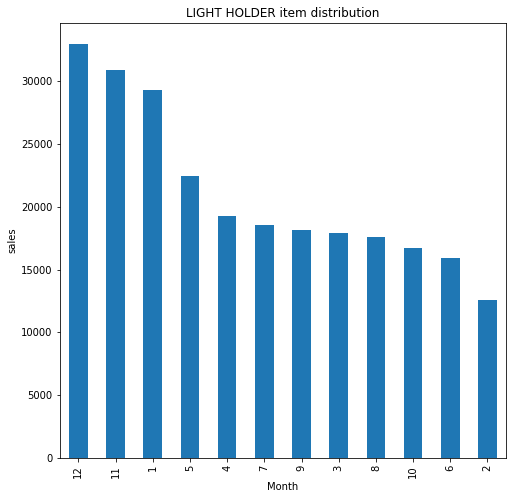

In [62]:
des['Sales'].groupby(des['Month']).agg(sum).sort_values(ascending = False).plot(kind = 'bar')
plt.title("LIGHT HOLDER item distribution")
plt.ylabel('sales')

In [63]:
des = modified_df[modified_df['StockCode'] == '22086']
des

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
151,22086,2009-12-01 10:06:00,United Kingdom,13758,35.40,PAPER CHAIN KIT 50'S CHRISTMAS,12,2009,Europe
277,22086,2009-12-01 10:59:00,United Kingdom,17238,14.75,PAPER CHAIN KIT 50'S CHRISTMAS,12,2009,Europe
296,22086,2009-12-01 11:17:00,United Kingdom,15712,17.70,PAPER CHAIN KIT 50'S CHRISTMAS,12,2009,Europe
370,22086,2009-12-01 11:37:00,United Kingdom,17700,35.40,PAPER CHAIN KIT 50'S CHRISTMAS,12,2009,Europe
433,22086,2009-12-01 11:41:00,EIRE,14911,17.70,PAPER CHAIN KIT 50'S CHRISTMAS,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
804774,22086,2011-12-08 18:42:00,United Kingdom,17530,8.85,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011,Europe
804922,22086,2011-12-08 19:29:00,United Kingdom,14702,11.80,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011,Europe
804965,22086,2011-12-08 19:57:00,United Kingdom,12748,8.85,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011,Europe
805151,22086,2011-12-09 09:38:00,United Kingdom,17001,35.40,PAPER CHAIN KIT 50'S CHRISTMAS,12,2011,Europe


Text(0, 0.5, 'sales')

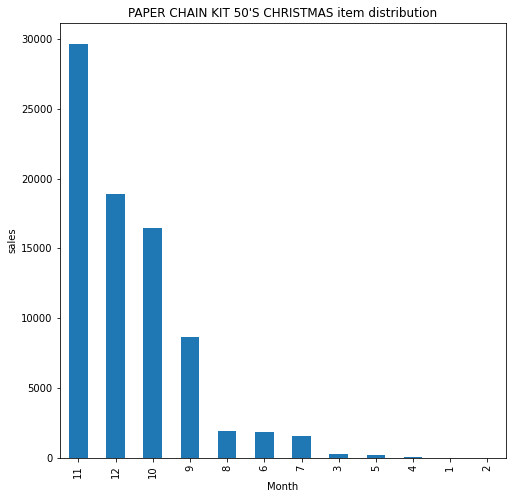

In [64]:
des['Sales'].groupby(des['Month']).agg(sum).sort_values(ascending = False).plot(kind = 'bar')
plt.title("PAPER CHAIN KIT 50'S CHRISTMAS item distribution")
plt.ylabel('sales')

In [65]:
des = modified_df[modified_df['StockCode'] == '22112']
des

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
53,22112,2009-12-01 09:08:00,United Kingdom,15362,14.85,CHOCOLATE HOT WATER BOTTLE,12,2009,Europe
153,22112,2009-12-01 10:06:00,United Kingdom,13758,59.40,CHOCOLATE HOT WATER BOTTLE,12,2009,Europe
647,22112,2009-12-01 11:57:00,United Kingdom,14871,4.95,CHOCOLATE HOT WATER BOTTLE,12,2009,Europe
1657,22112,2009-12-01 14:19:00,United Kingdom,12836,9.90,CHOCOLATE HOT WATER BOTTLE,12,2009,Europe
1917,22112,2009-12-01 15:36:00,United Kingdom,17243,29.70,CHOCOLATE HOT WATER BOTTLE,12,2009,Europe
...,...,...,...,...,...,...,...,...,...
804438,22112,2011-12-08 15:36:00,United Kingdom,13890,14.85,CHOCOLATE HOT WATER BOTTLE,12,2011,Europe
805048,22112,2011-12-09 08:48:00,Norway,12433,44.55,CHOCOLATE HOT WATER BOTTLE,12,2011,Europe
805138,22112,2011-12-09 09:07:00,United Kingdom,14441,29.70,CHOCOLATE HOT WATER BOTTLE,12,2011,Europe
805222,22112,2011-12-09 10:20:00,United Kingdom,16558,29.70,CHOCOLATE HOT WATER BOTTLE,12,2011,Europe


Text(0, 0.5, 'sales')

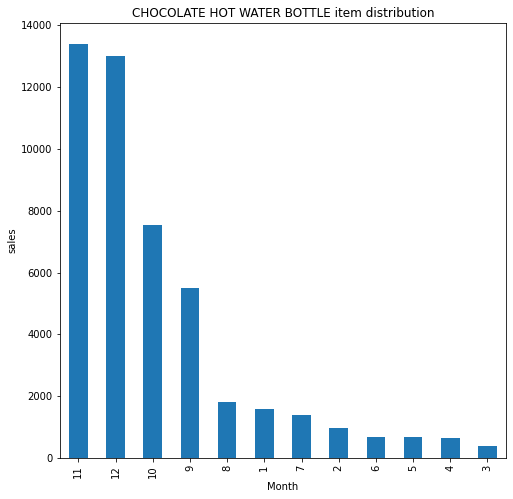

In [66]:
des['Sales'].groupby(des['Month']).agg(sum).sort_values(ascending = False).plot(kind = 'bar')
plt.title('CHOCOLATE HOT WATER BOTTLE item distribution')
plt.ylabel('sales')

In [67]:
# modified_df[['Month','Year']].value_counts()

In [68]:
year_2009 = modified_df[modified_df['Year'] == 2009]
year_2009['Month'].value_counts()

12    30761
Name: Month, dtype: int64

In [69]:
year_2010 = modified_df[modified_df['Year'] == 2010]
year_2010['Month'].value_counts()

11    60316
10    49563
12    40665
9     34602
3     32302
6     31191
5     28644
4     27238
7     27033
8     26393
2     23369
1     21778
Name: Month, dtype: int64

In [70]:
year_2011 = modified_df[modified_df['Year'] == 2011]
year_2011['Month'].value_counts()

11    64545
10    49557
9     40030
5     28322
6     27185
3     27177
8     27013
7     26827
4     22644
1     21232
2     19928
12    17305
Name: Month, dtype: int64

In [71]:
des = modified_df[modified_df['StockCode'] == '22041']
des

,StockCode,InvoiceDate,Country,Customer ID,Sales,Description,Month,Year,Continent
3,22041,2009-12-01 07:45:00,United Kingdom,13085,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
121,22041,2009-12-01 09:50:00,United Kingdom,14110,100.80,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
2280,22041,2009-12-02 09:47:00,United Kingdom,13777,504.00,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
5713,22041,2009-12-03 14:07:00,United Kingdom,13085,30.60,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
8425,22041,2009-12-04 15:18:00,United Kingdom,17127,30.60,"RECORD FRAME 7"" SINGLE SIZE",12,2009,Europe
...,...,...,...,...,...,...,...,...,...
791433,22041,2011-12-02 13:21:00,United Kingdom,15311,2.55,"RECORD FRAME 7"" SINGLE SIZE",12,2011,Europe
797293,22041,2011-12-05 17:17:00,United Kingdom,14096,24.80,"RECORD FRAME 7"" SINGLE SIZE",12,2011,Europe
799599,22041,2011-12-06 14:23:00,United Kingdom,17841,7.65,"RECORD FRAME 7"" SINGLE SIZE",12,2011,Europe
799916,22041,2011-12-06 15:28:00,United Kingdom,12989,61.20,"RECORD FRAME 7"" SINGLE SIZE",12,2011,Europe


Text(0, 0.5, 'sales')

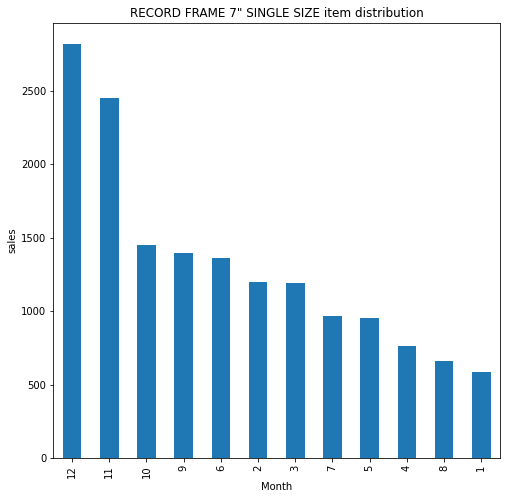

In [72]:
des['Sales'].groupby(des['Month']).agg(sum).sort_values(ascending = False).plot(kind = 'bar')
plt.title('RECORD FRAME 7" SINGLE SIZE item distribution')
plt.ylabel('sales')